In [179]:
import pandas as pd
import os
from glob import glob
import platform
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.font_manager as fm
import seaborn as sns
import ast

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# pandas 전체 출력 형식 설정(지수 표기 -> 자연수 표기)
pd.set_option('display.float_format', '{:,.0f}'.format)

pd.set_option('display.max_columns',100) # pandas 내 모든 칼럼 표시
pd.set_option('display.max_rows', None) # pandas 내 모든 행 표시
pd.set_option('display.max_seq_items', None) # 출력 옵션 설정
pd.set_option('display.max_colwidth', None) # pandas 최대 열 너비 늘리기기

---
---
# 2. votes

## 2.5 accounts_group

In [2]:
accounts_group_df = pd.read_parquet('./data/votes/accounts_group.parquet')

In [3]:
accounts_group_df.head() # 84,515 행, 4 열

,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1


In [4]:
accounts_group_df.describe()

,id,grade,class_num,school_id
count,"84,515","84,515","84,515","84,515"
mean,"42,279",2,5,"3,079"
std,"24,401",1,4,"1,675"
min,1,1,0,1
25%,"21,148",2,2,"1,752"
50%,"42,279",2,4,"3,023"
75%,"63,412",3,7,"4,620"
max,"84,546",20,41,"5,965"


In [5]:
accounts_group_df['school_id'].nunique()

5604

In [6]:
%xdel accounts_group_df

---
---
## 2.6 accounts_nearbyschool

In [7]:
accounts_nearbyschool_df = pd.read_parquet('./data/votes/accounts_nearbyschool.parquet')

In [8]:
accounts_nearbyschool_df.head() # 59,500행, 4열

,id,distance,nearby_school_id,school_id
0,119021,0,6,7
1,119022,0,13,7
2,119023,0,20,7
3,119024,0,4,7
4,119025,0,24,7


In [9]:
accounts_nearbyschool_df.describe()

,id,distance,nearby_school_id,school_id
count,"59,500","59,500","59,500","59,500"
mean,"148,770",0,"2,977","2,981"
std,"17,176",1,"1,707","1,719"
min,"119,021",0,4,4
25%,"133,896",0,"1,518","1,493"
50%,"148,770",0,"2,973","2,980"
75%,"163,645",0,"4,448","4,469"
max,"178,520",49,"5,964","5,964"


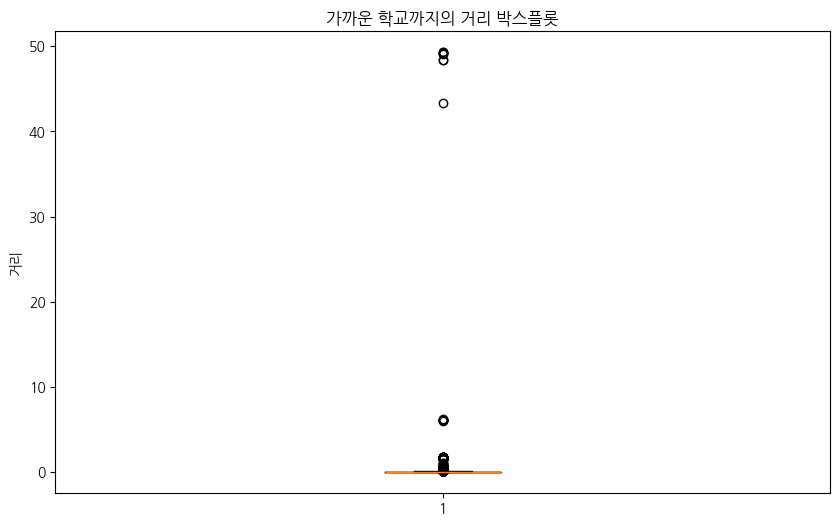

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot(accounts_nearbyschool_df['distance'])
plt.title('가까운 학교까지의 거리 박스플롯')
plt.ylabel('거리')
plt.show()

In [11]:
q1 = accounts_nearbyschool_df['distance'].quantile(0.25)
q3 = accounts_nearbyschool_df['distance'].quantile(0.75)

iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = accounts_nearbyschool_df[(accounts_nearbyschool_df['distance'] < lower_bound) | (accounts_nearbyschool_df['distance'] > upper_bound)]
print(f"이상치 개수: {len(outliers)}")

이상치 개수: 4118


In [12]:
%xdel accounts_nearbyschool_df

---
---
## 2.7 accounts_paymenthistory

In [13]:
accounts_paymenthistory_df = pd.read_parquet('./data/votes/accounts_paymenthistory.parquet')

In [14]:
accounts_paymenthistory_df.head() # 95,140 행, 5 열

,id,productId,phone_type,created_at,user_id
0,6,heart.777,A,2023-05-13 21:28:34,1211127
1,7,heart.777,A,2023-05-13 21:29:39,1151343
2,8,heart.777,A,2023-05-13 21:31:33,1002147
3,9,heart.777,A,2023-05-13 21:31:39,1095040
4,11,heart.777,A,2023-05-13 21:34:32,1164081


In [15]:
accounts_paymenthistory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95140 entries, 0 to 95139
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          95140 non-null  int64         
 1   productId   95140 non-null  object        
 2   phone_type  95140 non-null  object        
 3   created_at  95140 non-null  datetime64[ns]
 4   user_id     95140 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.6+ MB


In [16]:
accounts_paymenthistory_df.describe()

,id,created_at,user_id
count,"95,140",95140,"95,140"
mean,"49,137",2023-05-27 21:47:32.003741952,"1,256,912"
min,6,2023-05-13 21:28:34,"833,041"
25%,"24,532",2023-05-16 11:48:44.750000128,"1,116,654"
50%,"49,176",2023-05-21 12:40:45.500000,"1,270,988"
75%,"73,740",2023-05-27 13:02:52.249999872,"1,417,660"
max,"98,078",2024-05-08 14:12:45,"1,583,632"
std,"28,367",NaN,"191,124"


In [17]:
# 결제한 유저 수
accounts_paymenthistory_df['user_id'].nunique()

59192

In [18]:
accounts_paymenthistory_df['user_id'].value_counts().describe()

count   59,192
mean         2
std          2
min          1
25%          1
50%          1
75%          2
max         60
Name: count, dtype: float64

In [19]:
# 유저 당 평균 결제 횟수
accounts_paymenthistory_df.groupby('user_id').size().mean().round(2)

1.61

In [20]:
# 결제 헤비 유저
accounts_paymenthistory_df['user_id'].value_counts().head(10)

user_id
1527451    60
1246471    51
1141603    35
1204373    34
1142775    30
1099530    27
1170271    27
1358363    25
1455819    25
1413488    24
Name: count, dtype: int64

In [21]:
# 제 3분위수인 2회 초과 결제한 유저 수
pay_over2=(accounts_paymenthistory_df['user_id'].value_counts() > 2).sum()
pay_over2

7561

In [22]:
# 2회 초과 결제한 유저의 비율
total_pay_user = accounts_paymenthistory_df['user_id'].nunique()
(pay_over2 / total_pay_user * 100).round(2)

12.77

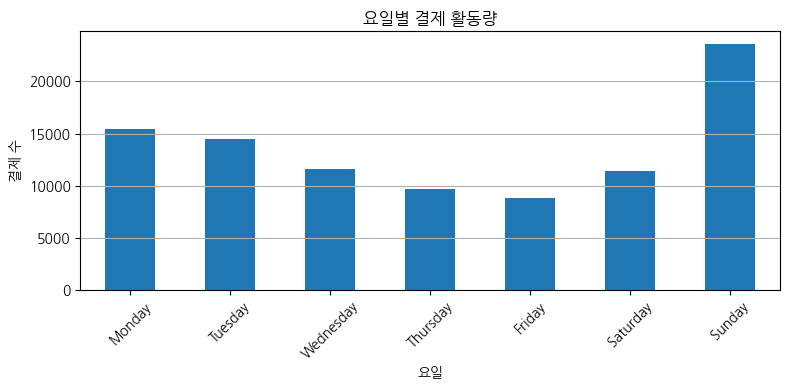

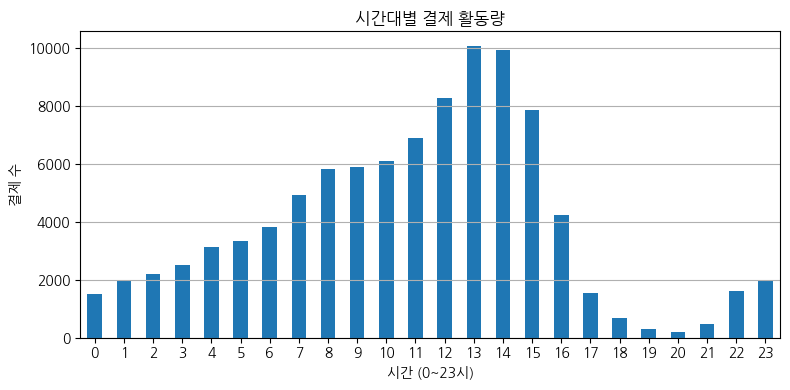

In [23]:
# 요일 및 시간 추출
accounts_paymenthistory_df['weekday'] = accounts_paymenthistory_df['created_at'].dt.day_name()
accounts_paymenthistory_df['hour'] = accounts_paymenthistory_df['created_at'].dt.hour

# 요일별 결제 횟수 시각화
plt.figure(figsize=(8, 4))
accounts_paymenthistory_df['weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar')
plt.title("요일별 결제 활동량")
plt.xlabel("요일")
plt.ylabel("결제 수")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 시간대별 결제 횟수 시각화
plt.figure(figsize=(8, 4))
accounts_paymenthistory_df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title("시간대별 결제 활동량")
plt.xlabel("시간 (0~23시)")
plt.ylabel("결제 수")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [24]:
%xdel accounts_paymenthistory_df

---
---
## 2.8 accounts_pointhistory

In [25]:
accounts_pointhistory_df = pd.read_parquet('./data/votes/accounts_pointhistory.parquet')

In [26]:
accounts_pointhistory_df.head() # 2,338,918 행, 5 열

,id,delta_point,created_at,user_id,user_question_record_id
0,790629,9,2023-04-28 12:27:49,849436,"771,777"
1,790652,9,2023-04-28 12:28:02,849436,"771,800"
2,790664,5,2023-04-28 12:28:09,849436,"771,812"
3,790680,13,2023-04-28 12:28:16,849436,"771,828"
4,790703,5,2023-04-28 12:28:26,849436,"771,851"


In [27]:
accounts_pointhistory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338918 entries, 0 to 2338917
Data columns (total 5 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       int64         
 1   delta_point              int64         
 2   created_at               datetime64[ns]
 3   user_id                  int64         
 4   user_question_record_id  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 89.2 MB


In [28]:
accounts_pointhistory_df.describe()

,id,delta_point,created_at,user_id,user_question_record_id
count,"2,338,918","2,338,918",2338918,"2,338,918","2,335,926"
mean,"126,536,375",1,2023-05-18 03:06:43.825683968,"1,111,554","61,418,035"
min,"790,629","-1,000",2023-04-28 12:27:49,"838,023","771,777"
25%,"41,125,051",7,2023-05-11 04:37:02,"886,189","20,885,606"
50%,"112,397,138",10,2023-05-16 07:29:11,"1,126,012","55,406,136"
75%,"198,205,120",13,2023-05-22 13:47:48.750000128,"1,260,221","95,558,554"
max,"340,672,375","1,000",2024-05-08 01:36:18,"1,583,358","161,666,464"
std,"96,109,918",59,NaN,"202,443","45,319,697"


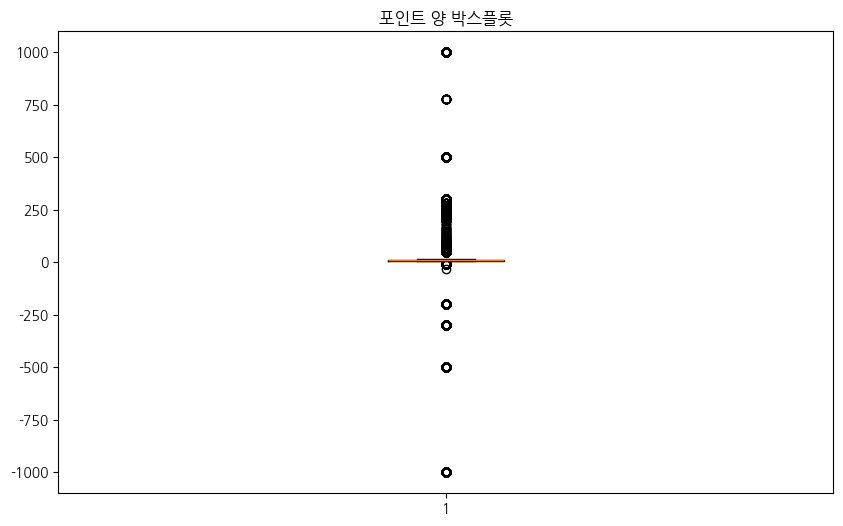

In [29]:
plt.figure(figsize=(10, 6))
plt.boxplot(accounts_pointhistory_df['delta_point'])
plt.title('포인트 양 박스플롯')
plt.show()

In [30]:
q1 = accounts_pointhistory_df['delta_point'].quantile(0.25)
q3 = accounts_pointhistory_df['delta_point'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = accounts_pointhistory_df[(accounts_pointhistory_df['delta_point'] < lower_bound) | (accounts_pointhistory_df['delta_point'] > upper_bound)]
print(f"이상치 개수: {len(outliers)}")

이상치 개수: 111574


In [31]:
# 전체 데이터 대비 이상치 비율
counts = accounts_pointhistory_df['user_id'].nunique()
len(outliers) / counts

22.1508834623784

In [32]:
%xdel accounts_pointhistory_df

---
---
## 2.9 accounts_school

In [33]:
accounts_school_df = pd.read_parquet('./data/votes/accounts_school.parquet')

In [34]:
accounts_school_df.head() # 5,951 행, 4 열

,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M


In [35]:
accounts_school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5951 entries, 0 to 5950
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5951 non-null   int64 
 1   address        5951 non-null   object
 2   student_count  5951 non-null   int64 
 3   school_type    5951 non-null   object
dtypes: int64(2), object(2)
memory usage: 186.1+ KB


In [36]:
accounts_school_df.describe()

,id,student_count
count,"5,951","5,951"
mean,"2,981",114
std,"1,719",103
min,4,0
25%,"1,494",16
50%,"2,981",97
75%,"4,470",183
max,"5,965",578


In [37]:
accounts_school_df['school_type'].value_counts()

school_type
M    3290
H    2661
Name: count, dtype: int64

In [38]:
accounts_school_df['address'].value_counts() # 278개

address
경기도 화성시           78
경기도 부천시           60
경상남도 김해시          58
경기도 남양주시          58
대구광역시 달서구         56
서울특별시 노원구         54
경기도 성남시 분당구       53
서울특별시 송파구         52
제주특별자치도 제주시       52
광주광역시 북구          52
경상북도 구미시          50
대전광역시 서구          50
충청남도 세종특별자치시      49
경기도 평택시           49
서울특별시 강남구         49
경기도 파주시           48
서울특별시 강서구         47
인천광역시 서구          47
전라북도 익산시          46
인천광역시 부평구         45
경상남도 진주시          45
광주광역시 광산구         45
전라북도 전주시 완산구      42
대구광역시 북구          42
경기도 시흥시           42
경상북도 포항시 북구       42
강원도 원주시           41
인천광역시 남동구         41
전라남도 여수시          41
경상북도 경주시          40
대구광역시 수성구         40
대전광역시 유성구         40
경기도 김포시           39
서울특별시 은평구         38
경기도 고양시 덕양구       38
인천광역시 연수구         38
전라남도 순천시          38
경기도 의정부시          37
부산광역시 부산진구        37
강원도 춘천시           37
서울특별시 관악구         36
서울특별시 강동구         35
광주광역시 남구          35
경기도 수원시 영통구       34
서울특별시 양천구         34
충청북도 충주시          34
전라북도 전주시 덕진구      33
충청남도 

In [39]:
%xdel accounts_school_df

---
---
## 2.10 accounts_timelinereport / 유저 신고기록 테이블

In [138]:
accounts_timelinereport_df = pd.read_parquet('./data/votes/accounts_timelinereport.parquet')

In [41]:
accounts_timelinereport_df.head() # 208 행, 6 열

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049


In [42]:
accounts_timelinereport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       208 non-null    int64         
 1   reason                   208 non-null    object        
 2   created_at               208 non-null    datetime64[ns]
 3   reported_user_id         208 non-null    int64         
 4   user_id                  208 non-null    int64         
 5   user_question_record_id  208 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 9.9+ KB


In [43]:
accounts_timelinereport_df.describe()

,id,created_at,reported_user_id,user_id,user_question_record_id
count,208,208,208,208,208
mean,"9,786",2023-05-15 08:13:50.278846208,"1,132,497","1,159,946","49,325,579"
min,28,2023-05-06 04:44:57,"837,235","834,089","3,920,588"
25%,"6,124",2023-05-11 16:41:43.500000,"966,470","967,120","24,611,784"
50%,"10,095",2023-05-15 01:23:29,"1,144,432","1,184,397","47,403,268"
75%,"14,182",2023-05-18 18:01:18,"1,225,963","1,291,813","71,795,781"
max,"23,108",2023-06-02 08:30:06,"1,562,736","1,548,002","140,765,885"
std,"5,714",NaN,"169,412","180,096","33,112,807"


In [44]:
accounts_timelinereport_df['reason'].unique()

array(['타인을 사칭함', '친구를 비하하거나 조롱하는 어투', '허위 사실 언급', '선정적이거나 폭력적인 내용', '광고'],
      dtype=object)

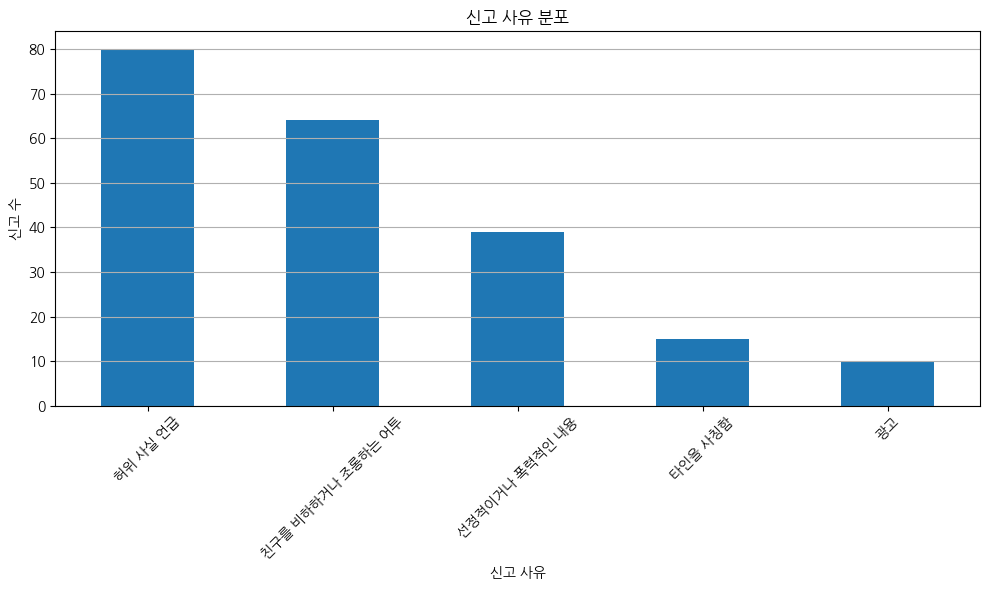

In [45]:
plt.figure(figsize=(10, 6))
accounts_timelinereport_df['reason'].value_counts().plot(kind='bar', title="신고 사유 분포")
plt.xlabel("신고 사유")
plt.ylabel("신고 수")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [46]:
# 신고 많이 한 유저
accounts_timelinereport_df['user_id'].value_counts().head(10)

user_id
1343904    19
1173995    10
1291813     9
944838      7
914800      6
1221550     5
867048      5
1131924     4
1415183     4
1319092     3
Name: count, dtype: int64

In [47]:
# 신고 많이 당한 유저
accounts_timelinereport_df['reported_user_id'].value_counts().head(10)

reported_user_id
1138757    15
1156031     8
1187305     7
939196      7
1225963     6
885129      6
885473      5
1207784     4
1131675     4
1479859     3
Name: count, dtype: int64

In [48]:
accounts_timelinereport_df['user_question_record_id'].value_counts().head(10)

user_question_record_id
78776644     14
18401879      6
5421572       5
5849834       4
96966251      3
33733213      3
5649541       3
101745323     2
24679508      2
20871584      2
Name: count, dtype: int64

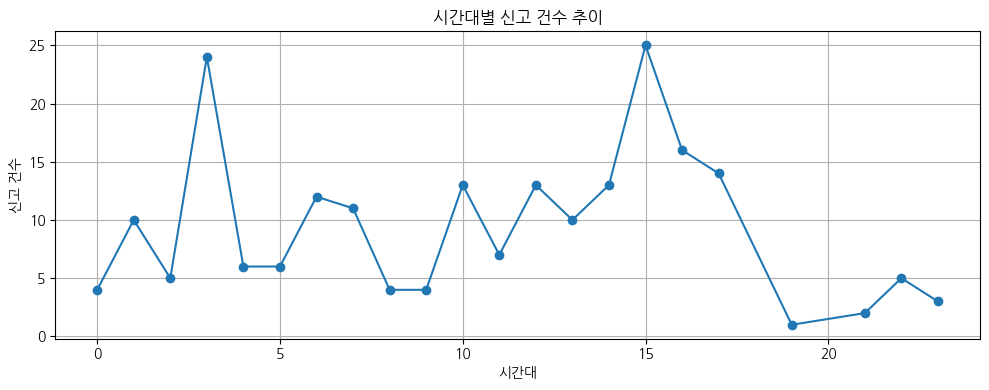

In [49]:
# 일자 기준 집계
daily_counts = accounts_timelinereport_df['created_at'].dt.hour.value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 4))
daily_counts.plot(kind='line', marker='o')
plt.title('시간대별 신고 건수 추이')
plt.xlabel('시간대')
plt.ylabel('신고 건수')
plt.grid(True)
plt.tight_layout()
plt.show()

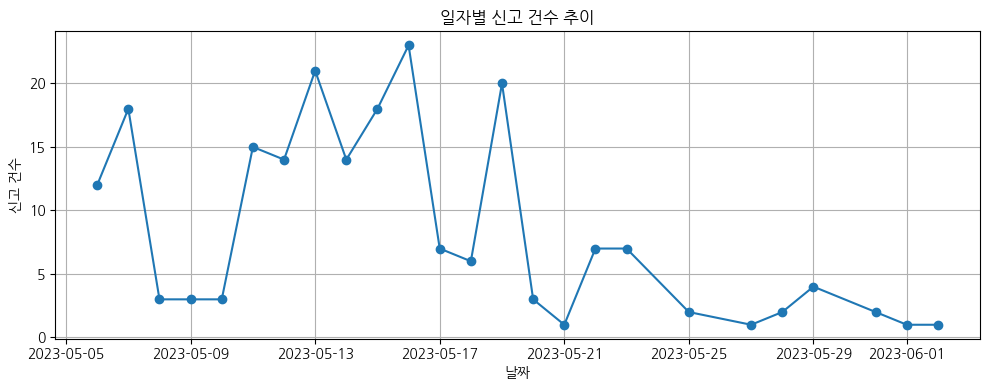

In [50]:
# 일자 기준 집계
daily_counts = accounts_timelinereport_df['created_at'].dt.date.value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 4))
daily_counts.plot(kind='line', marker='o')
plt.title('일자별 신고 건수 추이')
plt.xlabel('날짜')
plt.ylabel('신고 건수')
plt.grid(True)
plt.tight_layout()
plt.show()

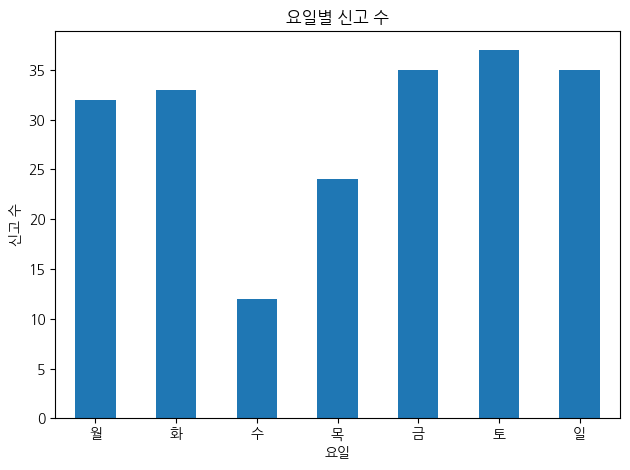

In [140]:
weekday_map = {
    'Monday': '월', 'Tuesday': '화', 'Wednesday': '수',
    'Thursday': '목', 'Friday': '금', 'Saturday': '토', 'Sunday': '일'
}

accounts_timelinereport_df['weekday'] = accounts_timelinereport_df['created_at'].dt.day_name()
accounts_timelinereport_df['weekday_kr'] = accounts_timelinereport_df['weekday'].map(weekday_map)

weekday_counts = accounts_timelinereport_df['weekday_kr'].value_counts().reindex(['월', '화', '수', '목', '금', '토', '일'])

weekday_counts.plot(kind='bar')
plt.title("요일별 신고 수")
plt.xlabel("요일")
plt.ylabel("신고 수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [51]:
# (신고자, 피신고자) 조합 기준으로 횟수 집계
pair_counts = accounts_timelinereport_df.groupby(['user_id', 'reported_user_id']).size().reset_index(name='count')

# 2회 이상 신고한 조합 필터링
repeated_reports = pair_counts[pair_counts['count'] > 1]

# 결과 확인
print(repeated_reports.sort_values(by='count', ascending=False).reset_index(drop=True))

    user_id  reported_user_id  count
0   1343904           1138757     15
1   1173995           1156031      7
2    944838            939196      7
3    914800            885129      6
4   1291813           1225963      6
5   1221550           1187305      5
6    867048            885473      5
7   1214760           1207784      3
8   1295255           1272969      3
9   1415183           1408207      3
10  1142867           1130375      3
11  1152559           1131675      3
12  1319092           1384178      3
13   866940           1140485      2
14  1402487           1479859      2
15  1416930           1467793      2
16  1421864            918506      2
17  1343904           1131668      2
18  1184397            967873      2
19  1291813           1207467      2
20  1204169           1207119      2
21  1161757           1551005      2
22  1115498           1115501      2
23   929494            883543      2
24   893684            888610      2
25   888390            883505      2
2

In [52]:
# 신고자-피신고자 쌍 중복 신고 리스트에서 사유 추출
merged = accounts_timelinereport_df.merge(
    repeated_reports[['user_id', 'reported_user_id']],
    on=['user_id', 'reported_user_id'],
    how='inner'
)

# 결과 보기
merged[['user_id', 'reported_user_id', 'reason', 'created_at']].sort_values(by=['user_id', 'reported_user_id']).head(10)

,user_id,reported_user_id,reason,created_at
53,866940,1140485,허위 사실 언급,2023-05-15 01:52:56
54,866940,1140485,허위 사실 언급,2023-05-15 01:53:00
2,867048,885473,허위 사실 언급,2023-05-07 03:03:58
3,867048,885473,허위 사실 언급,2023-05-07 03:04:01
4,867048,885473,허위 사실 언급,2023-05-07 03:04:03
5,867048,885473,허위 사실 언급,2023-05-07 03:04:04
6,867048,885473,허위 사실 언급,2023-05-07 03:04:06
66,881335,1196718,허위 사실 언급,2023-05-17 12:25:16
67,881335,1196718,허위 사실 언급,2023-05-17 12:25:21
29,887729,962262,허위 사실 언급,2023-05-12 12:05:59


In [53]:
# 유저-유저 쌍 + 사유 조합으로 몇 번 신고했는지
report_reason_group = merged.groupby(['user_id', 'reported_user_id', 'reason']).size().reset_index(name='count')
report_reason_group = report_reason_group.sort_values(by='count', ascending=False)

print(report_reason_group.head(10))

    user_id  reported_user_id             reason  count
36  1343904           1138757  친구를 비하하거나 조롱하는 어투     15
17  1173995           1156031     선정적이거나 폭력적인 내용      7
1    867048            885473           허위 사실 언급      5
12   944838            939196           허위 사실 언급      4
27  1291813           1225963  친구를 비하하거나 조롱하는 어투      4
15  1152559           1131675           허위 사실 언급      3
14  1142867           1130375  친구를 비하하거나 조롱하는 어투      3
11   944838            939196            타인을 사칭함      3
9    914800            885129           허위 사실 언급      3
18  1184397            967873                 광고      2


In [141]:
%xdel accounts_timelinereport_df
%xdel report_reason_group

NameError: name 'report_reason_group' is not defined


---
---
## 2.11 accounts_user_contacts / 유저 컨택 테이블

In [55]:
accounts_user_contacts_df = pd.read_parquet('./data/votes/accounts_user_contacts.parquet')

In [56]:
accounts_user_contacts_df.head() # 5,063 행, 4 열

,id,contacts_count,invite_user_id_list,user_id
0,259,30,[],1167696
1,1756,79,[],863169
2,13742,21,[854615],857205
3,13754,29,[],851431
4,13756,28,[849318],855476


In [57]:
accounts_user_contacts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   5063 non-null   int64 
 1   contacts_count       5063 non-null   int64 
 2   invite_user_id_list  5063 non-null   object
 3   user_id              5063 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 158.3+ KB


In [58]:
accounts_user_contacts_df['invite_user_id_list'].value_counts().head()

invite_user_id_list
[]           3905
[1154585]      15
[1233225]      12
[1041381]       9
[936990]        7
Name: count, dtype: int64

In [59]:
%xdel accounts_user_contacts_df

---
---
## 2.12 accounts_user / 유저 테이블

In [185]:
accounts_user_df = pd.read_parquet('./data/votes/accounts_user.parquet')

In [61]:
accounts_user_df.head() # 677,085 행, 16 열

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1274736]",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 837521, 833041, 832151, 1082907, 1426466, 1541413, 1577131, 837806, 834486, 834358, 1575225, 1576252, 837950, 1446852, 1577930, 841037, 1577938, 832340, 831958, 849624, 837338, 1577954, 849763, 862823, 1577703, 834415, 833009, 834289, 833011, 842865, 833013, 856050, 833017, 833018, 833022, 833023, 1580476, 1580855]",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 836496, 833041, 837521, 836498, 832920, 1082907, 1426466, 1541413, 837806, 834486, 834358, 1239225, 1575225, 837950, 874050, 1446852, 841037, 834643, 832340, 836693, 849624, 837338, 831962, 832986, 849763, 874212, 832740, 832614, 862823, 840046, 834415, 856050, 832894, 1577131, 1577703, 1577930, 1577938, 1577954, 1578661, 1579185, 1579656, 1580105, 1580329, 1437875, 1580855, 1581251]",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 832520, 838541, 836496, 837521, 833041, 836498, 832151, 832920, 1082907, 1426466, 848557, 837806, 842927, 834486, 841271, 834358, 1239225, 842814, 837950, 874050, 841037, 834643, 836693, 836055, 849624, 832857, 831962, 832986, 837338, 849763, 832740, 874212, 832614, 862823, 842987, 840046, 834415, 842865, 842994, 832894, 1575225, 1577131, 1577703, 1577930, 1577938, 1577954, 1578661, 1579185, 1579656, 1580105, 1580329, 1437875]",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 840046, 837806, 833041, 1341587, 832340, 1239225, 842814, 1577131, 1577938, 834358, 1446852, 1437875, 1581251]",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12


In [62]:
accounts_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677085 entries, 0 to 677084
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  677085 non-null  int64         
 1   is_superuser        677085 non-null  int64         
 2   is_staff            677085 non-null  int64         
 3   gender              677083 non-null  object        
 4   point               677085 non-null  int64         
 5   friend_id_list      677085 non-null  object        
 6   is_push_on          677085 non-null  int64         
 7   created_at          677085 non-null  datetime64[ns]
 8   block_user_id_list  677085 non-null  object        
 9   hide_user_id_list   677085 non-null  object        
 10  ban_status          677085 non-null  object        
 11  report_count        677085 non-null  int64         
 12  alarm_count         677085 non-null  int64         
 13  pending_chat        677085 no

In [63]:
accounts_user_df.describe()

,id,is_superuser,is_staff,point,is_push_on,created_at,report_count,alarm_count,pending_chat,pending_votes,group_id
count,"677,085","677,085","677,085","677,085","677,085",677085,"677,085","677,085","677,085","677,085","677,082"
mean,"1,212,969",0,0,"3,039",1,2023-05-15 22:46:01.709213440,0,1,0,85,"37,023"
min,"831,956",0,0,0,0,2023-03-29 03:44:14.047130,0,0,-1,0,1
25%,"1,028,075",0,0,400,1,2023-05-09 01:35:23.126586880,0,0,0,2,"18,488"
50%,"1,211,729",0,0,965,1,2023-05-13 10:50:57.476214016,0,1,0,29,"35,614"
75%,"1,397,906",0,0,"2,183",1,2023-05-20 07:49:47.800349952,0,1,0,122,"54,534"
max,"1,583,733",1,1,"885,000,006",1,2024-05-09 08:31:17.710824,253,"40,878","5,712","3,352","84,546"
std,"213,897",0,0,"1,076,020",0,NaN,1,56,11,123,"21,998"


In [64]:
(accounts_user_df['point'] > 2183).sum()

169219

In [65]:
(accounts_user_df['point'] > 1000000).sum()

4

In [66]:
accounts_user_df.isna().sum()

id                    0
is_superuser          0
is_staff              0
gender                2
point                 0
friend_id_list        0
is_push_on            0
created_at            0
block_user_id_list    0
hide_user_id_list     0
ban_status            0
report_count          0
alarm_count           0
pending_chat          0
pending_votes         0
group_id              3
dtype: int64

In [67]:
accounts_user_df['gender'].value_counts()

gender
F    396665
M    280418
Name: count, dtype: int64

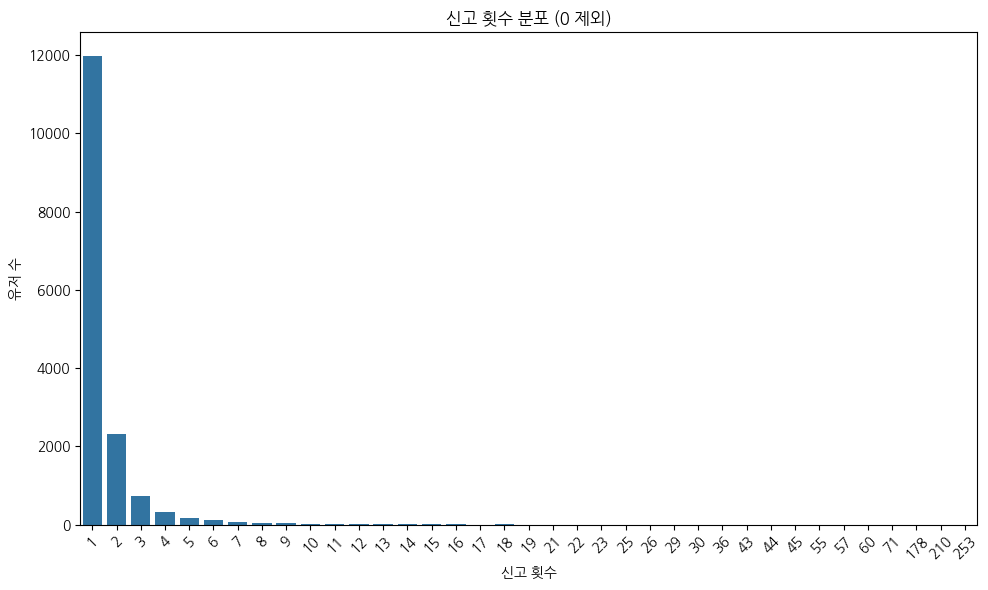

In [68]:
plt.figure(figsize=(10, 6))

# 0건 이상 유저 제외
reported_users_df = accounts_user_df[accounts_user_df['report_count'] > 0]

sns.countplot(x='report_count', data=reported_users_df)
plt.title('신고 횟수 분포 (0 제외)')
plt.xlabel('신고 횟수')
plt.ylabel('유저 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

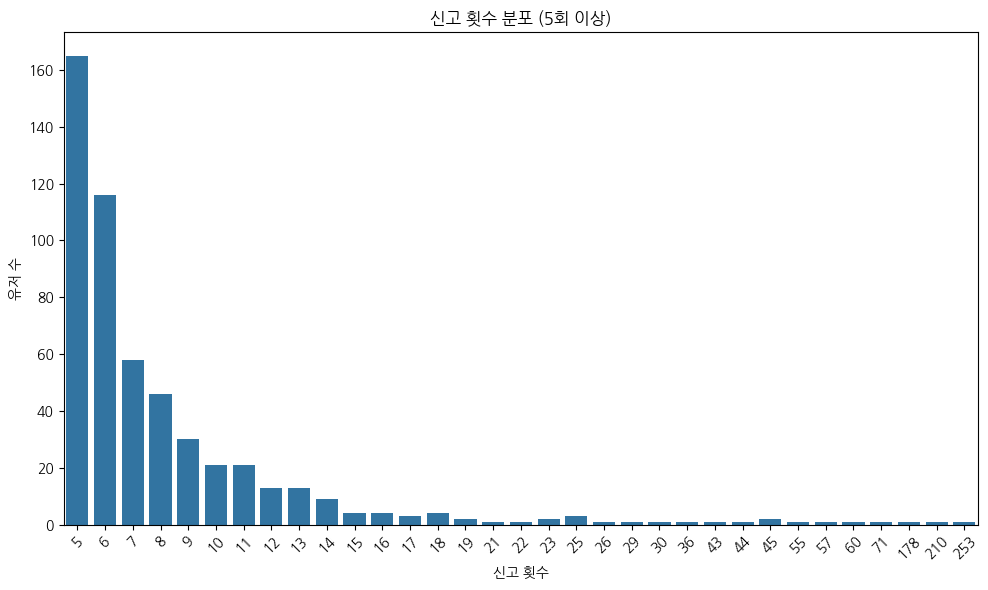

In [69]:
plt.figure(figsize=(10, 6))

# 신고 5회 이상 유저만 시각화
heavy_reported = accounts_user_df[accounts_user_df['report_count'] >= 5]


sns.countplot(x='report_count', data=heavy_reported)
plt.title('신고 횟수 분포 (5회 이상)')
plt.xlabel('신고 횟수')
plt.ylabel('유저 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
accounts_user_df['ban_status'].value_counts()

ban_status
N     668432
W       7855
NB       608
RB       190
Name: count, dtype: int64

- N : (Normal) 일반 유저, 정상적으로 활동 중인 사용자
- W : (Withdrawn) 탈퇴한 유저
- NB : (Normal Banned) 계정 정지된 일반 유저
- RB : (Restricted Banned) 제한적으로 정지된 유저 (예: 특정 기능 제한)

In [ ]:
accounts_user_df.sort_values(by='report_count', ascending=False).head()

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 837521, 833041, 832151, 1082907, 1426466, 1541413, 1577131, 837806, 834486, 834358, 1575225, 1576252, 837950, 1446852, 1577930, 841037, 1577938, 832340, 831958, 849624, 837338, 1577954, 849763, 862823, 1577703, 834415, 833009, 834289, 833011, 842865, 833013, 856050, 833017, 833018, 833022, 833023, 1580476, 1580855]",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12
50,834358,0,0,F,600426,"[841345, 982531, 832520, 838541, 846223, 833041, 837521, 832151, 832920, 1082907, 1426466, 1578661, 1577131, 834486, 1575225, 840252, 837950, 1446852, 1577930, 841037, 1577938, 832340, 832857, 831962, 837338, 832986, 832740, 832614, 862823, 1577703, 834415, 832894, 1579656, 1580105, 1580329, 1580855]",1,2023-04-03 10:37:13.518521,[],[869100],N,210,912,5712,28,1
693,838541,0,0,F,100404,"[841345, 982531, 843015, 879496, 832520, 844297, 843017, 833041, 837521, 832151, 1082907, 864030, 1426466, 843557, 1577131, 837806, 1437874, 1437875, 834486, 834358, 1575225, 840252, 837950, 1446852, 1577930, 844107, 841037, 1577938, 832340, 849624, 831962, 837338, 847197, 1577954, 849763, 832740, 832614, 862823, 842987, 840046, 834415, 1571952, 842994, 856050, 843002, 1579542, 1437875]",1,2023-04-19 16:36:39.906965,[],[],N,178,21442,4105,28,9
671688,1577954,0,0,F,99212,"[838785, 982531, 882567, 879496, 838541, 836496, 833041, 836498, 837521, 1341587, 832151, 832920, 1082907, 1578013, 864030, 1426466, 1578661, 1577131, 848557, 842927, 1437874, 841271, 1239225, 1575225, 837950, 842814, 1577930, 841037, 1577938, 834643, 832340, 836693, 849624, 837338, 831962, 849763, 862823, 856050, 832894, 1579542, 1579656, 1446852, 1580105, 1580329, 1437875, 1580476, 1580855, 1581251]",1,2023-07-09 18:07:04.204081,[],[],N,71,21,1801,11,1
62525,912951,0,0,M,3170,"[987654, 1184789, 1152044, 1068596, 987714, 934467, 907337, 907344, 988241, 906834, 1337943, 912474, 980574, 1156191, 1157220, 866408, 987756, 1205868, 1236601, 1145472, 1463425, 1073281, 1241225, 1156761, 918181, 1229991, 938667, 987825, 1104050, 1157302, 907448, 1211070, 1259201, 1285362, 1151761, 988959, 1029410, 991545, 1259322, 1258814, 988480, 1029955, 1302852, 1091397, 987974, 908108, 1072980, 979290, 936801, 1157482, 1227124, 1032055, 1171836, 1154953, 991628, 916375, 1026458, 985504, 888228, 1154987, 1116591, 1243058, 1286070, 980932, 1498056, 920523, 1157581, 1118671, 1282001, 1174486, 1282009, 1031133, 1288670, 1488871, 1187816, 1103336, 989167, 987634, 1576180]",0,2023-05-06 12:43:27.806935,[],"[929687, 909039, 895265, 951972, 1156563, 1154061, 1240952]",N,60,1,0,108,"17,079"
548685,1443618,0,0,M,2702,"[1414400, 1408385, 1443842, 1235972, 1443716, 901641, 1099662, 1131406, 1067670, 1066904, 1338392, 1064602, 1439646, 1090718, 1450272, 1257887, 975395, 1144493, 1131055, 1454385, 1408247, 1058365, 998720, 1443525, 1083591, 1410890, 1152083, 1351252, 1465557, 1482068, 852698, 1064026, 1416538, 1449060, 1084651, 1159787, 1443564, 1496436, 1443575, 1105784, 1064569, 1476986, 1006587, 1535487, 1559095]",1,2023-05-22 05:56:54.239799,[],[],N,57,1,0,45,"13,118"
366310,1242094,0,0,F,287,"[1299980, 1270291, 1318941, 1229854, 1286180, 1229863, 1228333, 1300015, 1310774, 1116219, 1231943, 1331274, 1224785, 1373286, 1390695, 1308273, 1299060, 1335416, 1237636, 1269906, 1299103, 843424, 1226399, 1289383, 1241263, 1230514, 1210035, 1313460, 1321661, 1173185, 1216710, 1230535, 1210570, 1248475, 1198814, 1274093, 1225965, 1229041, 1228534, 1385214, 1332489, 1219853, 1279247, 1216272, 1307408, 1305363, 1292564, 1151256, 1205529, 1263907, 1279268, 1270567, 1292071, 1218858, 1279274, 1288491, 1242931, 1201978, 1121087, 1232202, 1447245, 1210191, 1279314, 1266524, 1283425, 1284461, 1231735, 1202055, 1286536, 1216907, 1195403, 1250197, 1284515, 1357755, 1187275, 1280459, 1271245,

In [72]:
# account_timelinereport_df에서 신고 누적 3회 이상인 유저 찾기
accounts_timelinereport_df = pd.read_parquet('./data/votes/accounts_timelinereport.parquet')
repeated_targets = accounts_timelinereport_df.groupby(['reported_user_id']).size().reset_index(name='count')
repeated_targets[repeated_targets['count'] > 3]

,reported_user_id,count
15,885129,6
17,885473,5
29,939196,7
47,1131675,4
49,1138757,15
63,1156031,8
77,1187305,7
81,1207784,4
89,1225963,6


In [73]:
# 한 유저가 같은 유저를 반복 신고한 횟수
pair_repeat = accounts_timelinereport_df.groupby(['user_id', 'reported_user_id']).size().reset_index(name='count')
pair_repeat[pair_repeat['count'] > 1]

,user_id,reported_user_id,count
2,866940,1140485,2
3,867048,885473,5
9,881335,1196718,2
18,887729,962262,2
19,888390,883505,2
21,893684,888610,2
24,914800,885129,6
28,929494,883543,2
29,944838,939196,7
40,1115498,1115501,2


In [74]:
%xdel accounts_timelinereport_df

---
---
## 2.13 accounts_userquestionrecord

In [142]:
accounts_userquestionrecord_df = pd.read_parquet('./data/votes/accounts_userquestionrecord.parquet')

In [76]:
accounts_userquestionrecord_df.head() # 1,217,558 행, 12열

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0


In [77]:
accounts_userquestionrecord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217558 entries, 0 to 1217557
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1217558 non-null  int64         
 1   status             1217558 non-null  object        
 2   created_at         1217558 non-null  datetime64[ns]
 3   chosen_user_id     1217558 non-null  int64         
 4   question_id        1217558 non-null  int64         
 5   user_id            1217558 non-null  int64         
 6   question_piece_id  1217558 non-null  int64         
 7   has_read           1217558 non-null  int64         
 8   answer_status      1217558 non-null  object        
 9   answer_updated_at  1217558 non-null  datetime64[ns]
 10  report_count       1217558 non-null  int64         
 11  opened_times       1217558 non-null  int64         
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 111.5+ MB


In [78]:
accounts_userquestionrecord_df.describe()

,id,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_updated_at,report_count,opened_times
count,"1,217,558",1217558,"1,217,558","1,217,558","1,217,558","1,217,558","1,217,558",1217558,"1,217,558","1,217,558"
mean,"59,572,979",2023-05-17 12:51:25.947102208,"1,092,604",684,"1,105,790","74,132,115",1,2023-05-17 13:44:38.920359680,0,0
min,"771,777",2023-04-28 12:27:49,"833,112",99,"838,023","998,458",0,2023-04-28 12:27:49,0,0
25%,"15,539,653",2023-05-10 01:42:11,"883,692",275,"884,619","18,541,420",0,2023-05-10 02:38:44.750000128,0,0
50%,"53,026,805",2023-05-15 15:43:01.500000,"1,091,749",469,"1,117,537","66,168,426",1,2023-05-15 16:29:08.500000,0,0
75%,"94,809,596",2023-05-22 11:01:03.750000128,"1,235,698",942,"1,259,186","117,673,457",1,2023-05-22 11:41:54.750000128,0,0
max,"161,666,464",2024-05-08 01:36:18,"1,579,422","5,133","1,583,358","208,351,468",1,2024-05-08 01:36:18,14,3
std,"46,081,928",NaN,"202,758",625,"206,270","57,572,369",0,NaN,0,0


In [79]:
# created_at과 answer_updated_at이 다른 행만 필터링
diff_time_df = accounts_userquestionrecord_df[
    accounts_userquestionrecord_df["created_at"] != accounts_userquestionrecord_df["answer_updated_at"]
]

# 결과 개수와 예시 출력
print(f"시간이 다른 행 수: {len(diff_time_df)}")
diff_time_df.head()

시간이 다른 행 수: 121052


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
345,778243,C,2023-04-28 13:14:34,849548,200,850006,1009125,1,P,2023-05-06 16:49:33,0,0
1848,802848,C,2023-04-28 16:05:09,849548,166,850610,1043525,1,P,2023-05-06 16:49:21,0,0
3097,815819,I,2023-04-28 23:31:19,849515,320,847375,1034711,1,P,2023-05-06 10:09:27,0,1
10109,945319,I,2023-04-29 13:22:05,849995,132,851717,1213085,1,P,2023-05-06 10:31:30,0,3
11512,989867,C,2023-04-29 15:20:38,849498,315,850180,1259999,1,A,2023-05-12 15:33:47,0,0


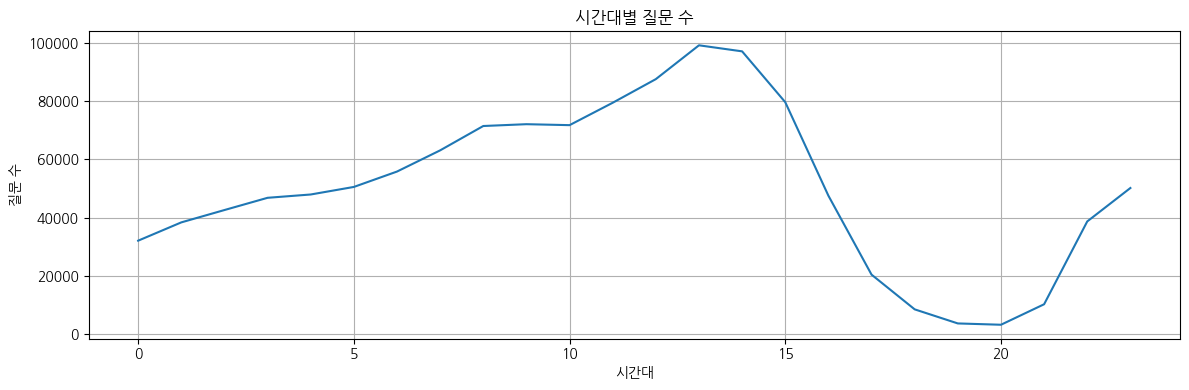

In [80]:
daily_questions = accounts_userquestionrecord_df['created_at'].dt.hour.value_counts().sort_index()
plt.figure(figsize=(12, 4))
daily_questions.plot()
plt.title("시간대별 질문 수")
plt.xlabel("시간대")
plt.ylabel("질문 수")
plt.grid(True)
plt.tight_layout()
plt.show()

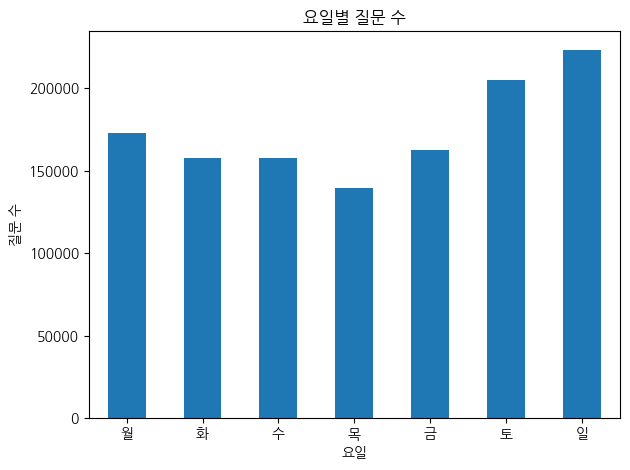

In [145]:
weekday_map = {
    'Monday': '월', 'Tuesday': '화', 'Wednesday': '수',
    'Thursday': '목', 'Friday': '금', 'Saturday': '토', 'Sunday': '일'
}

accounts_userquestionrecord_df['weekday'] = accounts_userquestionrecord_df['created_at'].dt.day_name()
accounts_userquestionrecord_df['weekday_kr'] = accounts_userquestionrecord_df['weekday'].map(weekday_map)

weekday_counts = accounts_userquestionrecord_df['weekday_kr'].value_counts().reindex(['월', '화', '수', '목', '금', '토', '일'])

weekday_counts.plot(kind='bar')
plt.title("요일별 질문 수")
plt.xlabel("요일")
plt.ylabel("질문 수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

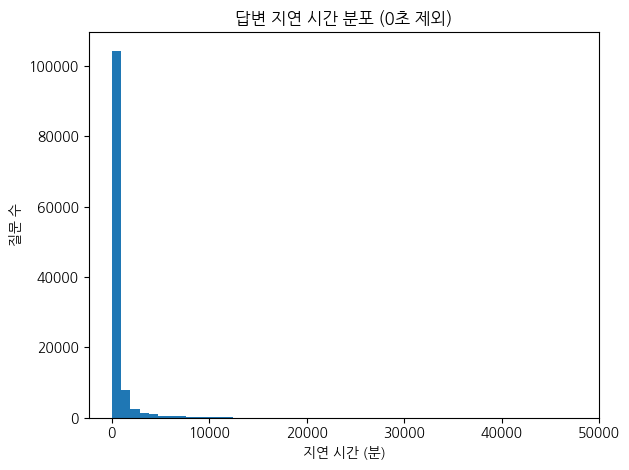

In [81]:
# 지연 시간 계산 (초 단위)
accounts_userquestionrecord_df['response_delay_sec'] = (accounts_userquestionrecord_df['answer_updated_at'] - accounts_userquestionrecord_df['created_at']).dt.total_seconds()

# 지연 시간이 0초보다 큰 경우만 필터링
nonzero_delay = accounts_userquestionrecord_df[accounts_userquestionrecord_df['response_delay_sec'] > 0]

# 히스토그램 시각화
plt.hist(nonzero_delay ['response_delay_sec'] / 60, bins=50)  # 분 단위
plt.title("답변 지연 시간 분포 (0초 제외)")
plt.xlabel("지연 시간 (분)")
plt.ylabel("질문 수")
plt.tight_layout()
plt.show()


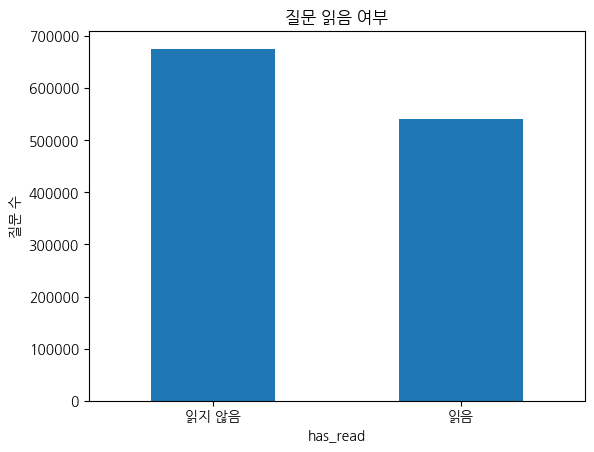

In [82]:
read_counts = accounts_userquestionrecord_df['has_read'].value_counts()
read_counts.plot(kind='bar')
plt.title("질문 읽음 여부")
plt.xticks([0, 1], ['읽지 않음', '읽음'], rotation=0)
plt.ylabel("질문 수")
plt.show()

신고된 질문 수: 169


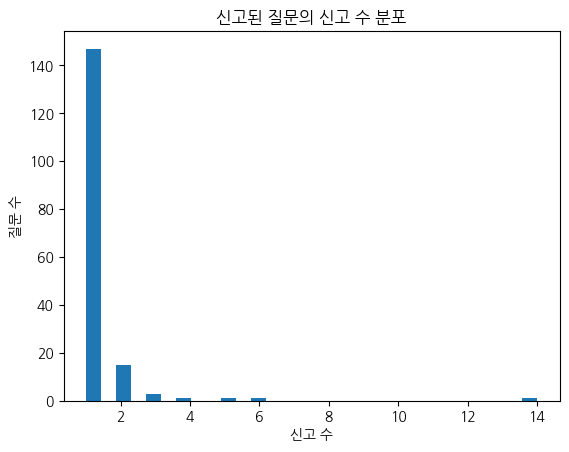

In [83]:
reported = accounts_userquestionrecord_df[accounts_userquestionrecord_df['report_count'] > 0]
print(f"신고된 질문 수: {len(reported)}")

# 신고 수 분포
plt.hist(reported['report_count'], bins=30)
plt.title("신고된 질문의 신고 수 분포")
plt.xlabel("신고 수")
plt.ylabel("질문 수")
plt.show()

In [84]:
unopened_rate = (accounts_userquestionrecord_df['opened_times'] == 0).mean()
print(f"열지 않은 질문 비율: {unopened_rate:.2%}")


열지 않은 질문 비율: 95.02%


In [85]:
unread_and_unanswered = accounts_userquestionrecord_df[(accounts_userquestionrecord_df['has_read'] == 0) & (accounts_userquestionrecord_df['answer_status'] == 'N')]
print(f"읽지 않았고 아직 답변 없는 질문 수: {len(unread_and_unanswered)}")

읽지 않았고 아직 답변 없는 질문 수: 541627


In [86]:
# 읽지 않고 답변도 없는 질문 비율
len(unread_and_unanswered)/len(accounts_userquestionrecord_df) * 100

44.48469805955856

In [146]:
%xdel accounts_userquestionrecord_df

---
---
## 2.14 accounts_userwithdraw

In [88]:
accounts_userwithdraw_df = pd.read_parquet('./data/votes/accounts_userwithdraw.parquet')

In [89]:
accounts_userwithdraw_df.head() # 70,764 행, 3 열

,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19


In [90]:
accounts_userwithdraw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70764 entries, 0 to 70763
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          70764 non-null  int64         
 1   reason      70764 non-null  object        
 2   created_at  70764 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ MB


In [91]:
accounts_userwithdraw_df.describe()

,id,created_at
count,"70,764",70764
mean,"35,499",2023-06-12 06:34:26.762464
min,42,2023-03-29 13:22:12
25%,"17,804",2023-05-12 06:28:54.249999872
50%,"35,498",2023-05-20 15:50:53.500000
75%,"53,199",2023-06-14 12:13:03.500000
max,"70,893",2024-05-09 08:49:06
std,"20,440",NaN


In [92]:
accounts_userwithdraw_df['reason'].unique()

array(['재밌는 질문이 없어서', '함께 할 친구가 없어서', '기타 이유', 'test', '버그가 너무 많아서',
       '구독료가 너무 비싸서', '기타', 'admin'], dtype=object)

In [93]:
accounts_userwithdraw_df['reason'].value_counts()

reason
기타 이유           40301
함께 할 친구가 없어서    14450
재밌는 질문이 없어서     13133
버그가 너무 많아서       2031
구독료가 너무 비싸서       730
admin              61
test               53
기타                  5
Name: count, dtype: int64

In [94]:
%xdel accounts_userwithdraw_df

---
---
## 2.15 event_receipts

In [148]:
event_receipts_df = pd.read_parquet('./data/votes/event_receipts.parquet')

In [96]:
event_receipts_df.head() # 309 행, 5 열

,id,created_at,event_id,user_id,plus_point
0,2,2023-06-22 09:25:16,1,1193618,500
1,3,2023-06-22 09:38:53,1,928351,500
2,4,2023-06-22 10:32:15,1,904872,500
3,5,2023-06-22 13:03:06,1,974697,500
4,6,2023-06-22 13:40:38,1,1168260,500


In [97]:
event_receipts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          309 non-null    int64         
 1   created_at  309 non-null    datetime64[ns]
 2   event_id    309 non-null    int64         
 3   user_id     309 non-null    int64         
 4   plus_point  309 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 12.2 KB


In [98]:
event_receipts_df.describe()

,id,created_at,event_id,user_id,plus_point
count,309,309,309,309,309
mean,161,2023-07-24 01:53:59.954692608,1,"1,179,715",560
min,2,2023-06-22 09:25:16,1,"837,836",500
25%,82,2023-07-10 16:58:20,1,"999,816",500
50%,161,2023-07-20 12:24:28,1,"1,139,491",500
75%,239,2023-07-29 09:38:22,1,"1,325,911",500
max,321,2023-11-21 12:03:02,3,"1,579,064","1,000"
std,92,NaN,1,"217,198",163


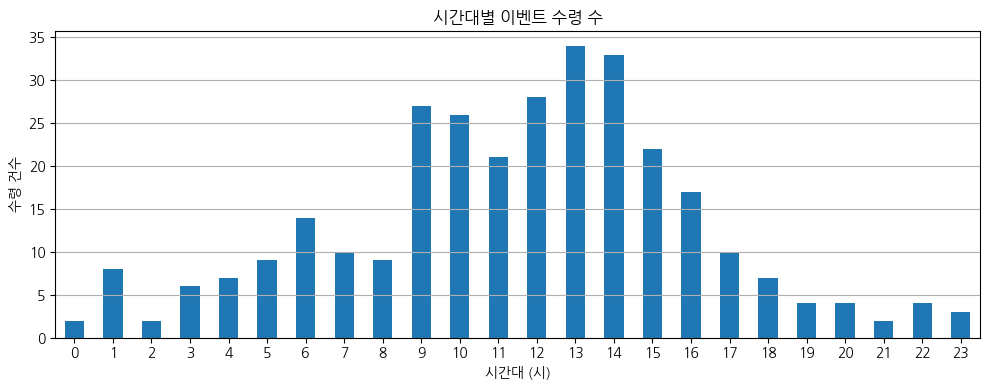

In [99]:
# 시간대(시단위) 추출
event_receipts_df['hour'] = event_receipts_df['created_at'].dt.hour

# 시간대별 수령 건수 집계
hourly_counts = event_receipts_df['hour'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 4))
hourly_counts.plot(kind='bar')
plt.title("시간대별 이벤트 수령 수")
plt.xlabel("시간대 (시)")
plt.ylabel("수령 건수")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

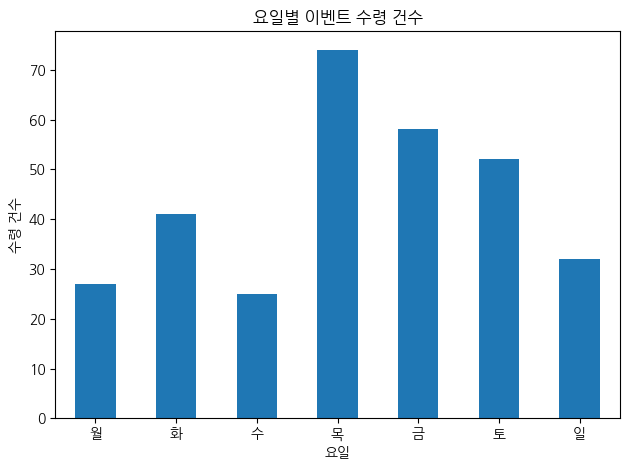

In [151]:
weekday_map = {
    'Monday': '월', 'Tuesday': '화', 'Wednesday': '수',
    'Thursday': '목', 'Friday': '금', 'Saturday': '토', 'Sunday': '일'
}

event_receipts_df['weekday'] = event_receipts_df['created_at'].dt.day_name()
event_receipts_df['weekday_kr'] = event_receipts_df['weekday'].map(weekday_map)

weekday_counts = event_receipts_df['weekday_kr'].value_counts().reindex(['월', '화', '수', '목', '금', '토', '일'])

weekday_counts.plot(kind='bar')
plt.title("요일별 이벤트 수령 건수")
plt.xlabel("요일")
plt.ylabel("수령 건수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [100]:
# 이벤트 수령이 많은 유저
event_receipts_df['user_id'].value_counts().head(10)

user_id
1577954    2
1193618    1
1084334    1
1222661    1
1230407    1
1210342    1
1167440    1
1297179    1
1153076    1
1075823    1
Name: count, dtype: int64

In [101]:
print("총 지급된 포인트:", event_receipts_df['plus_point'].sum())
print("유저당 평균 지급 포인트:", event_receipts_df.groupby('user_id')['plus_point'].sum().mean())

총 지급된 포인트: 173000
유저당 평균 지급 포인트: 561.6883116883117


In [102]:
event_point = event_receipts_df.groupby('event_id')['plus_point'].agg(['count', 'sum'])
event_point

,count,sum
event_id,,
1,252,126000
2,37,37000
3,20,10000


In [152]:
%xdel event_receipts_df
%xdel event_point

NameError: name 'event_point' is not defined


---
---
## 2.16 events

In [104]:
events_df = pd.read_parquet('./data/votes/events.parquet')

In [105]:
events_df.head() # 3 행, 6 열

,id,title,plus_point,event_type,is_expired,created_at
0,1,코드잇 은행 가입 이벤트,500,FCFS,1,2023-06-20 11:56:38
1,2,코드잇 멤버십 가입 이벤트,1000,FCFS,1,2023-08-08 07:43:45
2,3,예고 영상 기대평 이벤트,500,FCFS,1,2023-09-24 17:05:59


---
---
## 2.17 polls_question

In [106]:
polls_question_df = pd.read_parquet('./data/votes/polls_question.parquet')

In [107]:
polls_question_df.head() # 5,025 행, 3 열

,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55


In [108]:
polls_question_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             5025 non-null   int64         
 1   question_text  5025 non-null   object        
 2   created_at     5025 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 117.9+ KB


In [ ]:
# 질문 내용의 유니크 개수
polls_question_df['question_text'].nunique()

3903

In [ ]:
# 잘문 내용이 vote인 질문의 개수수
(polls_question_df['question_text'] == 'vote').sum()

56

In [ ]:
# 중복된 질문 내용 개수수
(polls_question_df['question_text'].duplicated()).sum()

1122

In [112]:
%xdel polls_question_df

---
---
## 2.18 polls_questionpiece

In [113]:
polls_questionpiece_df = pd.read_parquet('./data/votes/polls_questionpiece.parquet')

In [114]:
polls_questionpiece_df.shape

(1265476, 5)

In [115]:
polls_questionpiece_df.head() # 1,265,476 행, 5 열

,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0


In [116]:
polls_questionpiece_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265476 entries, 0 to 1265475
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1265476 non-null  int64         
 1   is_voted     1265476 non-null  int64         
 2   created_at   1265476 non-null  datetime64[ns]
 3   question_id  1265476 non-null  int64         
 4   is_skipped   1265476 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 48.3 MB


In [117]:
polls_questionpiece_df.describe()

,id,is_voted,created_at,question_id,is_skipped
count,"1,265,476","1,265,476",1265476,"1,265,476","1,265,476"
mean,"76,580,011",1,2023-05-17 13:39:58.427317504,713,0
min,"998,458",0,2023-04-28 12:27:22,99,0
25%,"20,292,596",1,2023-05-09 21:50:54,278,0
50%,"68,465,330",1,2023-05-15 14:18:31.500000,477,0
75%,"121,266,196",1,2023-05-22 09:56:44,982,0
max,"208,385,230",1,2024-05-07 11:32:30,"5,133",1
std,"59,129,239",0,NaN,671,0


In [118]:
# 투표 vs 스킵 비율 확인
polls_questionpiece_df[['is_voted', 'is_skipped']].sum()

is_voted      1218687
is_skipped       1127
dtype: int64

In [119]:
# 전체 수와 투표/스킵 수가 일치하지 않아서 추가확인

# 전체 수
total = len(polls_questionpiece_df)

# 각각의 조건 수 확인
voted = (polls_questionpiece_df['is_voted'] == 1).sum()
skipped = (polls_questionpiece_df['is_skipped'] == 1).sum()
neither = ((polls_questionpiece_df['is_voted'] == 0) & (polls_questionpiece_df['is_skipped'] == 0)).sum()

# 출력
print(f"전체 행 수: {total}")
print(f"투표한 경우: {voted}")
print(f"건너뛴 경우: {skipped}")
print(f"둘 다 안 한 경우 (미응답): {neither}")


전체 행 수: 1265476
투표한 경우: 1218687
건너뛴 경우: 1127
둘 다 안 한 경우 (미응답): 46789


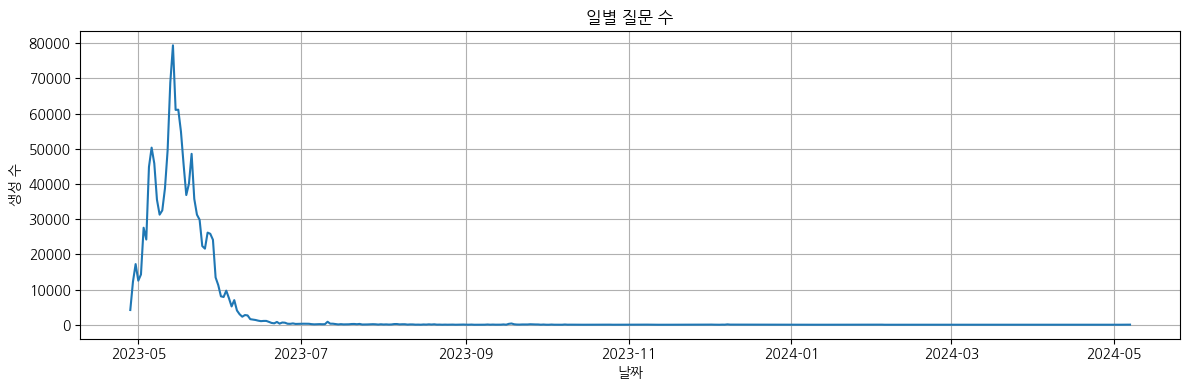

In [120]:
polls_questionpiece_df['created_at'] = pd.to_datetime(polls_questionpiece_df['created_at'])

# 일별 생성 수
created_per_day = polls_questionpiece_df['created_at'].dt.date.value_counts().sort_index()
created_per_day.plot(figsize=(12,4))
plt.title("일별 질문 수")
plt.xlabel("날짜")
plt.ylabel("생성 수")
plt.grid(True)
plt.tight_layout()
plt.show()


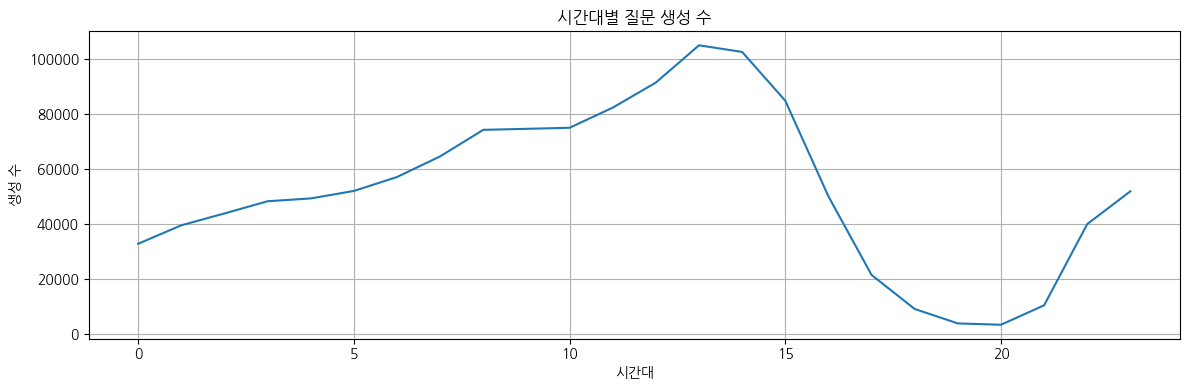

In [121]:
polls_questionpiece_df['created_at'] = pd.to_datetime(polls_questionpiece_df['created_at'])

# 일별 생성 수
created_per_day = polls_questionpiece_df['created_at'].dt.hour.value_counts().sort_index()
created_per_day.plot(figsize=(12,4))
plt.title("시간대별 질문 생성 수")
plt.xlabel("시간대")
plt.ylabel("생성 수")
plt.grid(True)
plt.tight_layout()
plt.show()


In [160]:
%xdel polls_questionpiece_df

---
---
## 2.19 polls_questionreport

In [122]:
polls_questionreport_df = pd.read_parquet('./data/votes/polls_questionreport.parquet')

In [123]:
polls_questionreport_df.head() # 51,424 행, 5 열

,id,reason,created_at,question_id,user_id
0,1,이 질문은 재미없어요,2023-04-19 06:20:35,250,837556
1,2,이 질문은 재미없어요,2023-04-19 06:58:09,113,837672
2,3,불쾌한 내용이 포함되어 있음,2023-04-19 06:58:17,113,837672
3,4,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:42,119,837922
4,5,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:50,119,837922


In [124]:
polls_questionreport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51424 entries, 0 to 51423
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           51424 non-null  int64         
 1   reason       51424 non-null  object        
 2   created_at   51424 non-null  datetime64[ns]
 3   question_id  51424 non-null  int64         
 4   user_id      51424 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.0+ MB


In [125]:
polls_questionreport_df.describe()

,id,created_at,question_id,user_id
count,"51,424",51424,"51,424","51,424"
mean,"28,027",2023-05-21 22:12:41.641120768,733,"1,168,247"
min,1,2023-04-19 06:20:35,99,"832,340"
25%,"14,021",2023-05-13 01:36:21.249999872,305,"978,481"
50%,"28,048",2023-05-18 14:33:45,494,"1,160,251"
75%,"42,084",2023-05-26 08:45:25,"1,021","1,351,295"
max,"55,767",2024-05-05 14:56:25,"5,110","1,583,634"
std,"16,163",NaN,666,"208,247"


In [126]:
polls_questionreport_df['reason'].unique()

array(['이 질문은 재미없어요', '불쾌한 내용이 포함되어 있음', '어떻게 이런 생각을? 이 질문 최고!', '기타',
       '선정적이거나 자극적인 질문', '오타가 있음', '한 친구가 질문을 반복적으로 보냄',
       '나랑 맞지 않는 질문인 것 같음', '그냥 싫어', '불쾌한 질문 내용', '자꾸 같은 내용의 질문 반복'],
      dtype=object)

In [127]:
polls_questionreport_df['reason'].value_counts()

reason
그냥 싫어                   28446
나랑 맞지 않는 질문인 것 같음        9541
불쾌한 질문 내용                5386
자꾸 같은 내용의 질문 반복          3202
어떻게 이런 생각을? 이 질문 최고!     1821
한 친구가 질문을 반복적으로 보냄       1701
기타                        480
이 질문은 재미없어요               471
불쾌한 내용이 포함되어 있음           250
오타가 있음                     68
선정적이거나 자극적인 질문             58
Name: count, dtype: int64

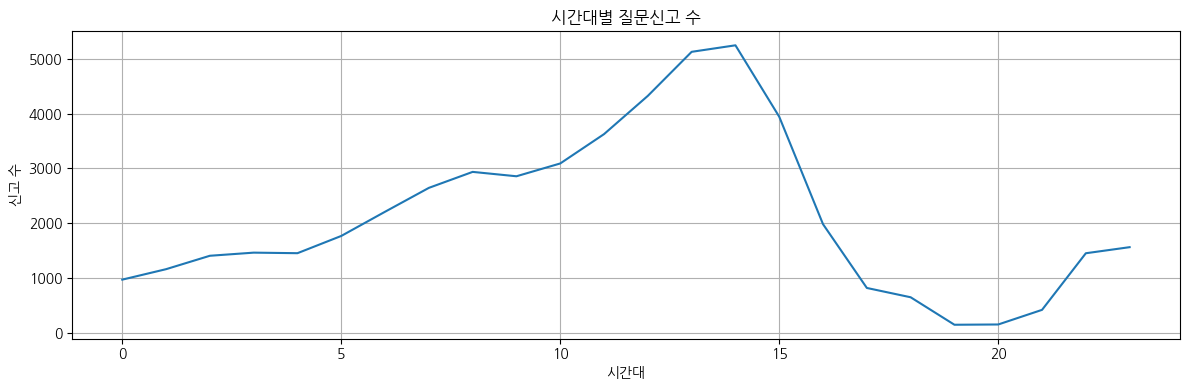

In [128]:
polls_questionreport_df['created_at'] = pd.to_datetime(polls_questionreport_df['created_at'])

# 일별 생성 수
created_per_day = polls_questionreport_df['created_at'].dt.hour.value_counts().sort_index()
created_per_day.plot(figsize=(12,4))
plt.title("시간대별 질문신고 수")
plt.xlabel("시간대")
plt.ylabel("신고 수")
plt.grid(True)
plt.tight_layout()
plt.show()

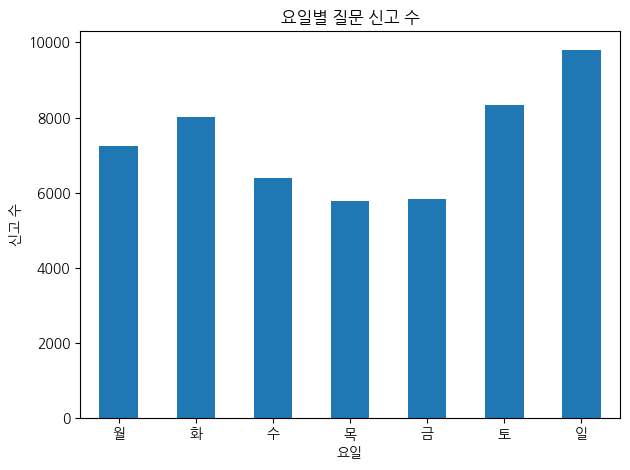

In [137]:
weekday_map = {
    'Monday': '월', 'Tuesday': '화', 'Wednesday': '수',
    'Thursday': '목', 'Friday': '금', 'Saturday': '토', 'Sunday': '일'
}

polls_questionreport_df['weekday'] = polls_questionreport_df['created_at'].dt.day_name()
polls_questionreport_df['weekday_kr'] = polls_questionreport_df['weekday'].map(weekday_map)

weekday_counts = polls_questionreport_df['weekday_kr'].value_counts().reindex(['월', '화', '수', '목', '금', '토', '일'])

weekday_counts.plot(kind='bar')
plt.title("요일별 질문 신고 수")
plt.xlabel("요일")
plt.ylabel("신고 수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

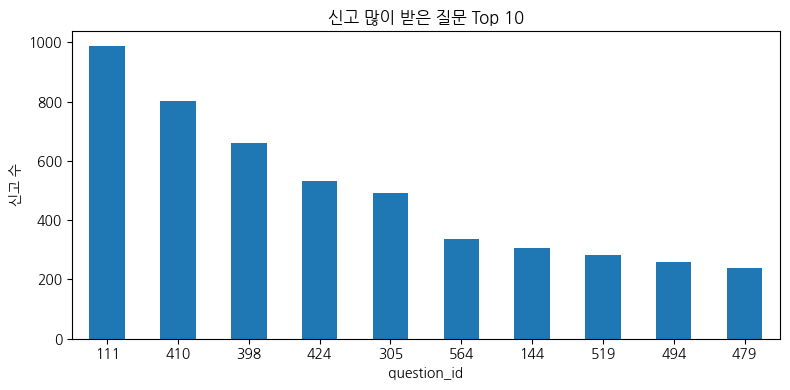

In [129]:
# 가장 많이 신고된 질문
top_reported_questions = polls_questionreport_df['question_id'].value_counts().head(10)

plt.figure(figsize=(8, 4))
top_reported_questions.plot(kind='bar')
plt.title("신고 많이 받은 질문 Top 10")
plt.xlabel("question_id")
plt.ylabel("신고 수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# 질문에 대한 신고 횟수 top10
polls_questionreport_df['user_id'].value_counts().head(10)

user_id
1441146    865
1330073    271
892516     254
1518143    167
1035498    159
1316535    152
1006953    151
1377605    140
1382117    129
962059     118
Name: count, dtype: int64

In [131]:
duplicate_reports = polls_questionreport_df.duplicated(subset=['question_id', 'user_id'])
print(f"같은 질문에 대해 동일 유저가 중복 신고한 건수: {duplicate_reports.sum()}")

같은 질문에 대해 동일 유저가 중복 신고한 건수: 6724


In [157]:
%xdel polls_questionreport_df

---
---
## 2.20 polls_questionset

In [153]:
polls_questionset_df = pd.read_parquet('./data/votes/polls_questionset.parquet')

In [155]:
polls_questionset_df.head() # 158,384 행, 6 열

,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,"[998458, 998459, 998460, 998461, 998462, 998463, 998464, 998465, 998466, 998467]",2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
1,99830,"[998588, 998589, 998590, 998591, 998592, 998593, 998594, 998595, 998596, 998597]",2023-04-28 12:28:07,F,2023-04-28 12:28:07,849438
2,99840,"[998689, 998691, 998693, 998695, 998697, 998699, 998700, 998702, 998704, 998706]",2023-04-28 12:28:38,F,2023-04-28 12:28:38,847375
3,99841,"[998688, 998690, 998692, 998694, 998696, 998698, 998701, 998703, 998705, 998707]",2023-04-28 12:28:38,F,2023-04-28 12:28:38,849446
4,99848,"[998768, 998769, 998770, 998771, 998772, 998773, 998774, 998775, 998776, 998777]",2023-04-28 12:28:57,F,2023-04-28 12:28:57,849477


In [156]:
polls_questionset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158384 entries, 0 to 158383
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      158384 non-null  int64         
 1   question_piece_id_list  158384 non-null  object        
 2   opening_time            158384 non-null  datetime64[ns]
 3   status                  158384 non-null  object        
 4   created_at              158384 non-null  datetime64[ns]
 5   user_id                 158384 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 7.3+ MB


In [178]:
polls_questionset_df['status'].value_counts()

status
F    153411
O      4407
C       566
Name: count, dtype: int64

- F : Finished
- O : Opened
- C : Closed

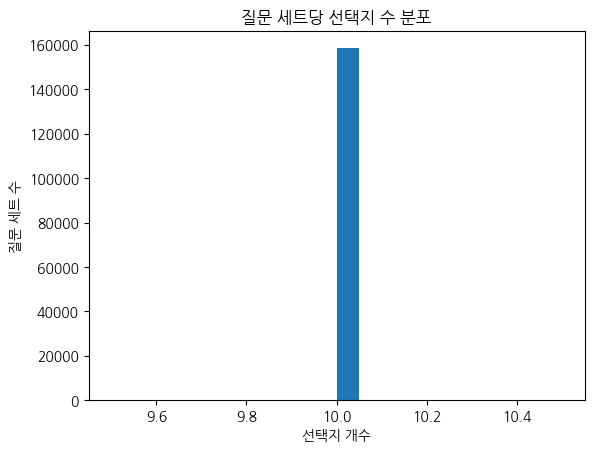

count   158,384
mean         10
std           0
min          10
25%          10
50%          10
75%          10
max          10
Name: num_choices, dtype: float64


In [ ]:
def safe_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except:
            return []  # 파싱 실패 시 빈 리스트 반환 (선택사항)
    return val  # 이미 리스트이면 그대로 반환

# 문자열을 리스트로 변환
polls_questionset_df['question_piece_id_list'] = polls_questionset_df['question_piece_id_list'].apply(safe_eval)

# 그 후 선택지 개수 계산
polls_questionset_df['num_choices'] = polls_questionset_df['question_piece_id_list'].apply(len)

# 분포 시각화
import matplotlib.pyplot as plt
polls_questionset_df['num_choices'].plot.hist(bins=20)
plt.title("질문 세트당 선택지 수 분포")
plt.xlabel("선택지 개수")
plt.ylabel("질문 세트 수")
plt.show()

# 통계값
print(polls_questionset_df['num_choices'].describe())

# 모든 선택지 수가 10개

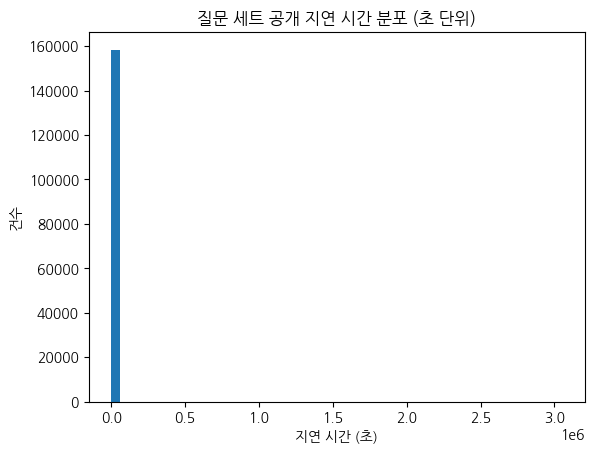

In [162]:
polls_questionset_df['opening_time'] = pd.to_datetime(polls_questionset_df['opening_time'])

# 시간 차이 계산 (초 단위)
polls_questionset_df['open_delay_sec'] = (
    polls_questionset_df['opening_time'] - polls_questionset_df['created_at']
).dt.total_seconds()

# 분포 확인
polls_questionset_df['open_delay_sec'].plot.hist(bins=50)
plt.title("질문 세트 공개 지연 시간 분포 (초 단위)")
plt.xlabel("지연 시간 (초)")
plt.ylabel("건수")
plt.show()

In [163]:
import pandas as pd

# 구간 설정
bins = [-1, 0, 1, 10, 60, 300, 1800, 3600, float('inf')]
labels = ['0초', '1초', '2~10초', '11~60초', '1~5분', '5~30분','30~60분', '1시간 이상']

# 구간별로 분류
polls_questionset_df['delay_group'] = pd.cut(polls_questionset_df['open_delay_sec'], bins=bins, labels=labels)

# 각 그룹별 개수 출력
group_counts = polls_questionset_df['delay_group'].value_counts().sort_index()
print(group_counts)


delay_group
0초          5038
1초             1
2~10초          2
11~60초        12
1~5분          90
5~30분        437
30~60분    151764
1시간 이상       361
Name: count, dtype: int64


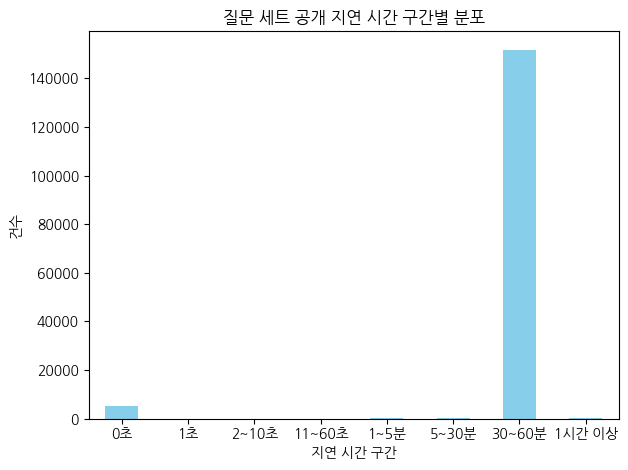

In [ ]:
group_counts.plot(kind='bar', color='skyblue')
plt.title("질문 세트 공개 지연 시간 구간별 분포")
plt.xlabel("지연 시간 구간")
plt.ylabel("건수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

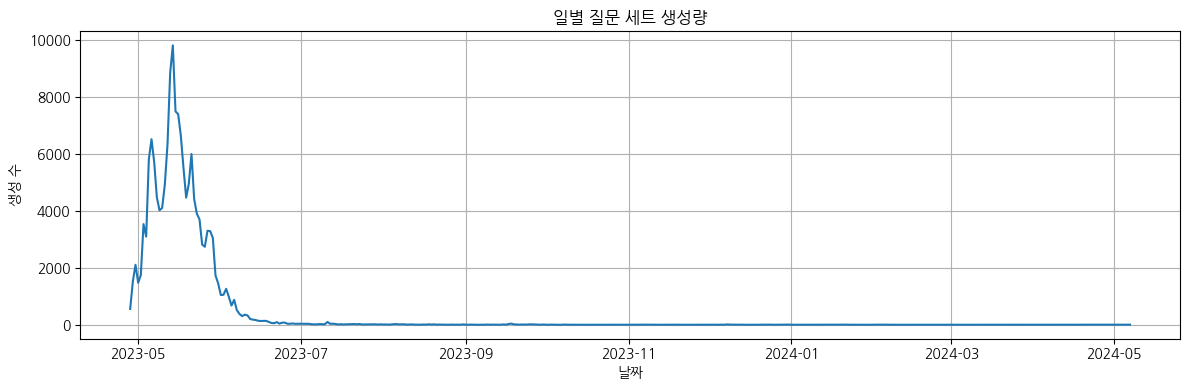

In [182]:
polls_questionset_df['created_at'] = pd.to_datetime(polls_questionset_df['created_at'])

created_per_day = polls_questionset_df['created_at'].dt.date.value_counts().sort_index()

created_per_day.plot(figsize=(12, 4))
plt.title("일별 질문 세트 생성량")
plt.xlabel("날짜")
plt.ylabel("생성 수")
plt.grid(True)
plt.tight_layout()
plt.show()

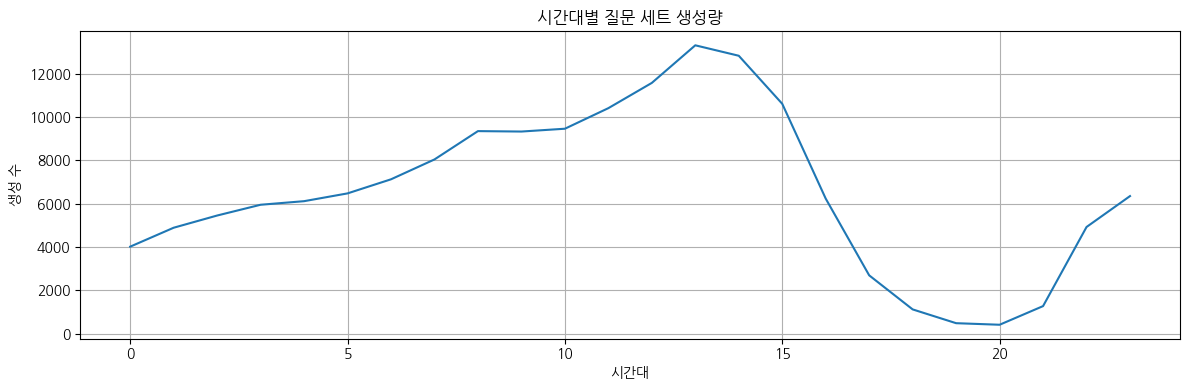

In [ ]:
polls_questionset_df['created_at'] = pd.to_datetime(polls_questionset_df['created_at'])

created_per_day = polls_questionset_df['created_at'].dt.hour.value_counts().sort_index()

created_per_day.plot(figsize=(12, 4))
plt.title("시간대별 질문 세트 생성량")
plt.xlabel("시간대")
plt.ylabel("생성 수")
plt.grid(True)
plt.tight_layout()
plt.show()

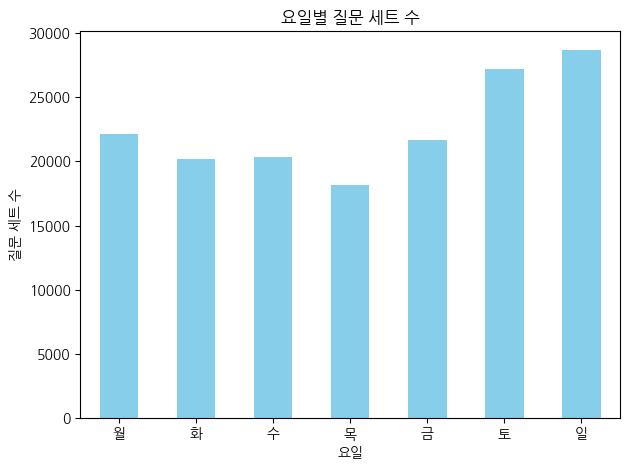

In [167]:
weekday_map = {
    'Monday': '월', 'Tuesday': '화', 'Wednesday': '수',
    'Thursday': '목', 'Friday': '금', 'Saturday': '토', 'Sunday': '일'
}

polls_questionset_df['weekday'] = polls_questionset_df['created_at'].dt.day_name()
polls_questionset_df['weekday_kr'] = polls_questionset_df['weekday'].map(weekday_map)

weekday_counts = polls_questionset_df['weekday_kr'].value_counts().reindex(['월', '화', '수', '목', '금', '토', '일'])

weekday_counts.plot(kind='bar', color='skyblue')
plt.title("요일별 질문 세트 수")
plt.xlabel("요일")
plt.ylabel("질문 세트 수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [194]:
%xdel polls_questionset_df
%xdel weekday_counts

---
---
## 2.21 polls_usercandidate

In [186]:
polls_usercandidate_df = pd.read_parquet('./data/votes/polls_usercandidate.parquet')

In [ ]:
polls_usercandidate_df.head() # 4,769,609 행, 4 열

,id,created_at,question_piece_id,user_id
0,3088872,2023-04-28 12:27:49,998458,849444
1,3088873,2023-04-28 12:27:49,998458,849454
2,3088874,2023-04-28 12:27:49,998458,849460
3,3088875,2023-04-28 12:27:49,998458,849469
4,3088964,2023-04-28 12:28:02,998459,849446


In [190]:
polls_usercandidate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769609 entries, 0 to 4769608
Data columns (total 4 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 int64         
 1   created_at         datetime64[ns]
 2   question_piece_id  int64         
 3   user_id            int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 145.6 MB


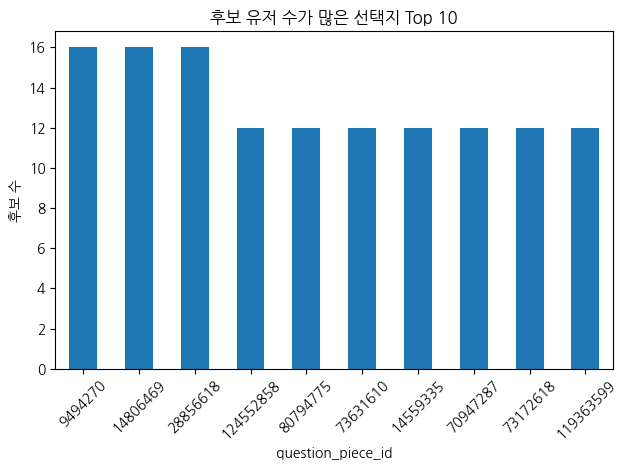

In [192]:
top_candidates = polls_usercandidate_df['question_piece_id'].value_counts().head(10)

top_candidates.plot(kind='bar')
plt.title("후보 유저 수가 많은 선택지 Top 10")
plt.xlabel("question_piece_id")
plt.ylabel("후보 수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

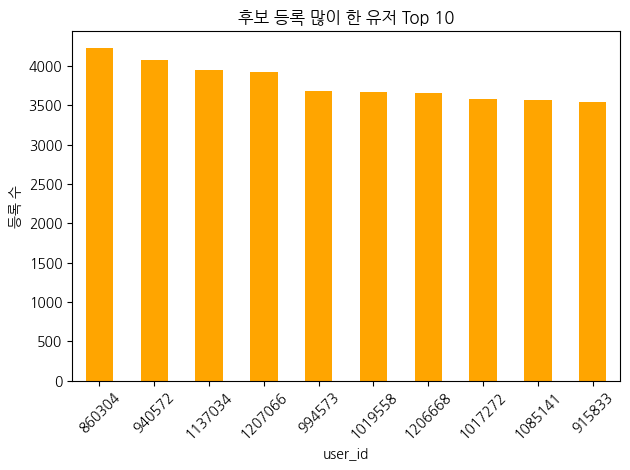

In [193]:
top_users = polls_usercandidate_df['user_id'].value_counts().head(10)

top_users.plot(kind='bar', color='orange')
plt.title("후보 등록 많이 한 유저 Top 10")
plt.xlabel("user_id")
plt.ylabel("등록 수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

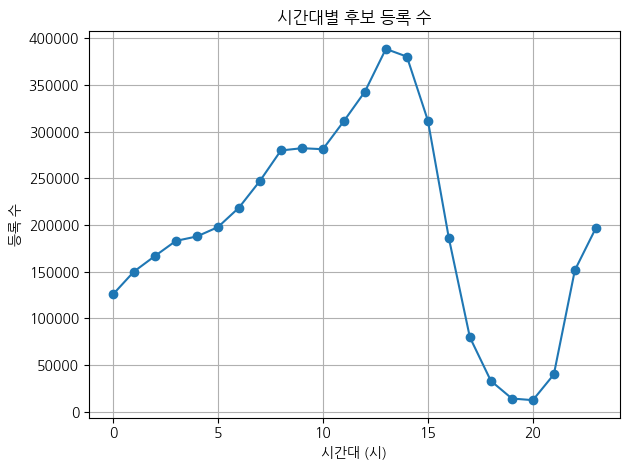

In [195]:
polls_usercandidate_df['created_at'] = pd.to_datetime(polls_usercandidate_df['created_at'])

hourly_counts = polls_usercandidate_df['created_at'].dt.hour.value_counts().sort_index()

hourly_counts.plot(kind='line', marker='o')
plt.title("시간대별 후보 등록 수")
plt.xlabel("시간대 (시)")
plt.ylabel("등록 수")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
duplicate_entries = polls_usercandidate_df.duplicated(subset=['user_id', 'question_piece_id'])
print(f"중복 등록 건수: {duplicate_entries.sum()}")

# 중복 데이터 확인
polls_usercandidate_df[duplicate_entries].head()

중복 등록 건수: 575


,id,created_at,question_piece_id,user_id
11818,3262911,2023-04-28 23:17:05,1035142,849977
11819,3262912,2023-04-28 23:17:05,1035142,850212
11820,3262913,2023-04-28 23:17:05,1035142,850215
11821,3262914,2023-04-28 23:17:05,1035142,850334
11826,3262979,2023-04-28 23:17:14,1035143,849443
